In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec

np.random.seed(42)

%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 10

In [21]:
!pip install minisom

In [0]:
# Create dataset

def generate_dataset():
  
    n = 51
    theta = np.linspace(0, 20, n)
    theta_val = np.linspace(0, 20, n//2)
    
    x1 = (theta/4) * np.cos(theta)
    y1 = (theta/4) * np.sin(theta)
    
    x1_val = (theta_val/4) * np.cos(theta_val)
    y1_val = (theta_val/4) * np.sin(theta_val)
    
    
    x2 = (theta/4 + 0.8) * np.cos(theta)
    y2 = (theta/4 + 0.8) * np.sin(theta)
    
    
    x2_val = (theta_val/4 + 0.8) * np.cos(theta_val)
    y2_val = (theta_val/4 + 0.8) * np.sin(theta_val)
    
    dt1 = np.c_[x1, y1, np.zeros(n)]
    dt2 = np.c_[x2, y2, np.ones(n)]
    
    dt1_val = np.c_[x1_val, y1_val, np.zeros(n//2)]
    dt2_val = np.c_[x2_val, y2_val, np.ones(n//2)]
    
    return np.r_[dt1, dt2], np.r_[dt1_val, dt2_val]
    
    

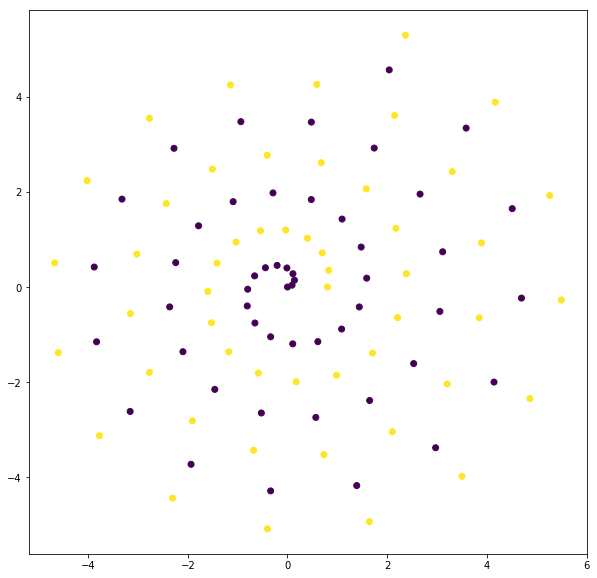

In [34]:
dt, dt_val = generate_dataset()
plt.scatter(dt[:,0], dt[:,1], c=dt[:,2])

In [0]:
x_train = dt[:,:2]
y_train = dt[:,2]

In [0]:
## SOM
from minisom import MiniSom    
dim = 30
som = MiniSom(dim, dim, 2, neighborhood_function='gaussian', sigma=4.0, random_seed=42) # initialization
som.pca_weights_init(x_train)
som.train_batch(x_train, 100000) # trains the SOM

In [0]:
# qnt = som.quantization(x_train)
# plt.scatter(qnt[:,0], qnt[:,1], c='r')

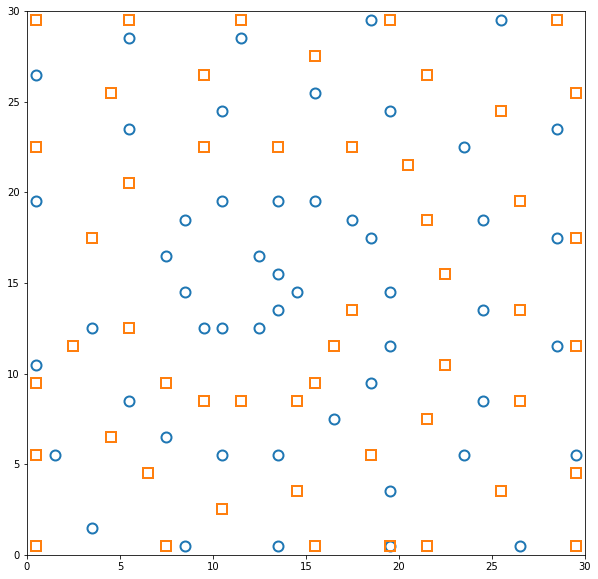

In [38]:

plt.figure(figsize=(10, 10))
# Plotting the response for each pattern in the iris dataset
#plt.pcolor(som.distance_map().T, cmap='Greys')  # plotting the distance map as background
#plt.colorbar()

#use different colors and markers for each label
t = np.array(y_train, dtype=int)
markers = ['o', 's']
colors = ['C0', 'C1']
for cnt, xx in enumerate(x_train):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=10, markeredgewidth=2)
plt.axis([0, dim, 0, dim])
plt.savefig('som_class.png')
plt.show()

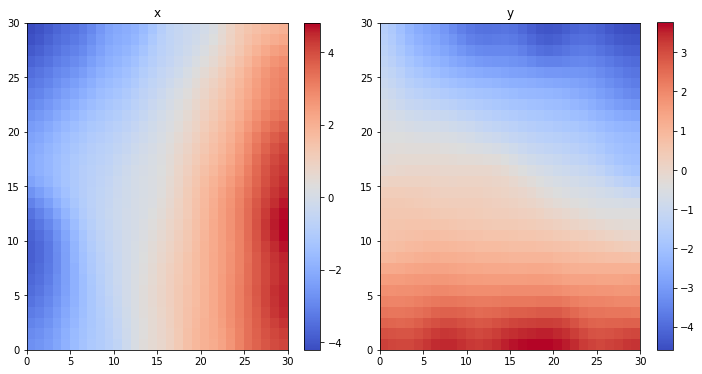

In [39]:
feature_names = ['x', 'y']

W = som.get_weights()
plt.figure(figsize=(10, 10))
for i, f in enumerate(feature_names):
    plt.subplot(2, 2, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.colorbar()
    plt.xticks(np.arange(0,dim+1, 5))
    plt.yticks(np.arange(0,dim+1, 5))
plt.tight_layout()
plt.show()

In [0]:
# x = np.linspace(-5, 5, 100)

# XX, YY = np.meshgrid(x, x)

# XX_pred, YY_pred = XX.ravel(), YY.ravel()

# grid_train = np.c_[XX_pred, YY_pred] 

# points = []
# for cnt, xx in enumerate(grid_train):
#     w = som.winner(xx)
#     points.append(w[0]+w[1])  # getting the winner

# #points = (np.array(points) / np.max(points)).round()
# points = np.array(points)


# plt.pcolor(XX, YY, points.reshape(len(XX), -1), cmap='bwr')
# plt.scatter(dt_val[:,0], dt_val[:,1], c=dt_val[:,2])
# # plt.savefig('grid_pred.png', dpi=300)

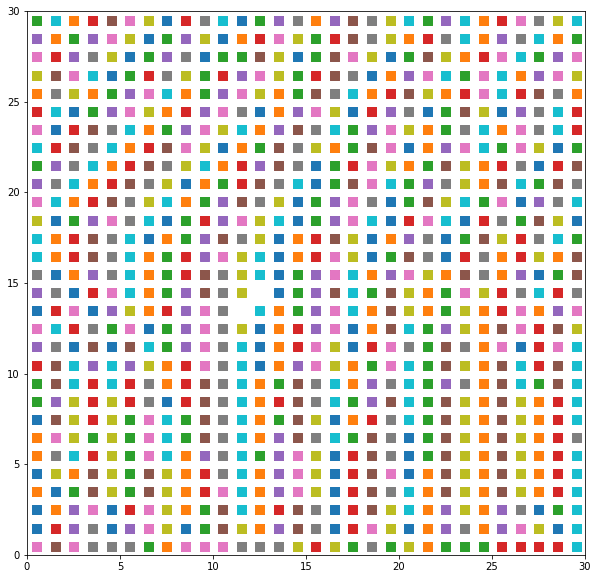

In [41]:
x = np.linspace(-5, 5, 100)

XX, YY = np.meshgrid(x, x)

XX_pred, YY_pred = XX.ravel(), YY.ravel()

grid_train = np.c_[XX_pred, YY_pred] 


plt.figure(figsize=(10, 10))
#use different colors and markers for each label
for cnt, xx in enumerate(grid_train):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, marker='s', markersize=9)
plt.axis([0, dim, 0, dim])
#plt.savefig('som_class.png')
plt.show()